# 워드 클라우드 - SOYNLP version

In [1]:
import re, joblib

In [2]:
with open('data/gift.txt', encoding='utf-8') as file:
    gift_text = file.read()

In [3]:
gift_text[:100]

'\n반지!목걸이!!!!!!!!\n커플 가디건이나 커플 모자는 어떠신지요 :-)\n몇개 추천제품들 투척하고 갑니다 ㅎㅎ\n더클래식 남녀 커플룩 오버핏 빅사이즈 하프 니트 가디건\nCOUPAN'

* 텍스트 전처리

In [7]:
new_gift_text = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣]', ' ', gift_text)
new_gift_text[:100]

' 반지 목걸이         커플 가디건이나 커플 모자는 어떠신지요     몇개 추천제품들 투척하고 갑니다 ㅎㅎ 더클래식 남녀 커플룩 오버핏 빅사이즈 하프 니트 가디건       '

* 명사 추출

In [8]:
# Konlpy에서는 
# from konlpy.tag import Okt
# okt = Okt()
# okt.nouns(new_gift_text)

from soynlp.tokenizer import NounLMatchTokenizer

noun_scores = joblib.load('data/noun_scores.pkl')
n_tokenizer = NounLMatchTokenizer(noun_scores)   # noun_scores를 파라미터로 하는 객체를 생성
gift_list = n_tokenizer.tokenize(new_gift_text)
len(gift_list)

16655

In [10]:
gift_list[:10]

['반지', '목걸이', '커플', '가디건', '커플', '모자', '어떠', '몇개', '추천제품들', '투척']

- 한글 폰트 사용

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

* 필요없는 단어 제거

In [12]:
import nltk

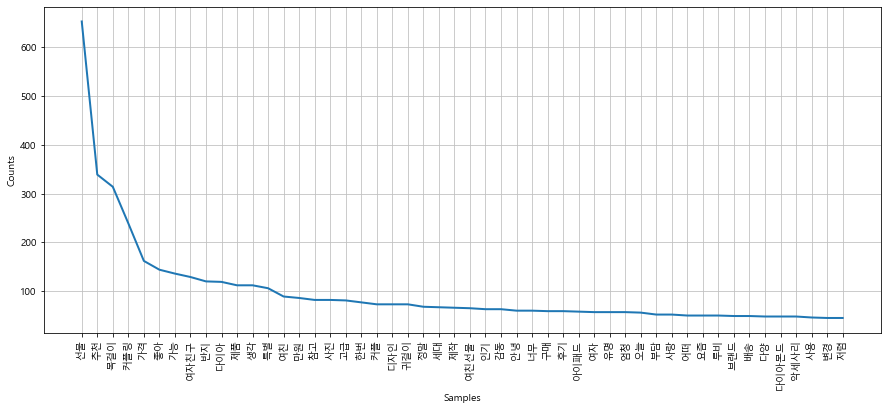

In [13]:
gf_gift = nltk.Text(gift_list, name='여친선물')
plt.figure(figsize=(15, 6))
gf_gift.plot(50)            # 많이 사용된 단어 50개 보여주기
plt.show()

In [52]:
# stop_list = ['선물', '추천']
stopwords = '가격 좋아 가능 여자친구 제품 생각 특별 여친 만원 참고 한번 고급 커플 선물 추천 정말 세대 여친선물 인기 제작 안녕 부담 너무 구매 후기 어떠 요즘 트렌드'
stop_list = stopwords.split()
gift_list = [gift for gift in gift_list if gift not in stop_list]

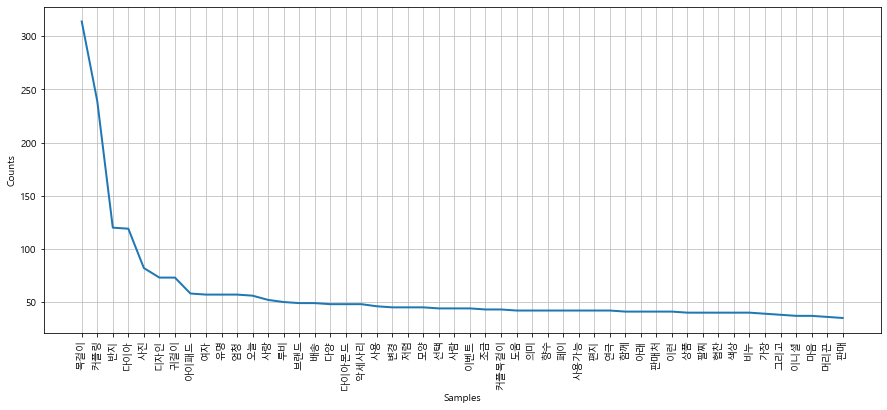

In [53]:
gf_gift = nltk.Text(gift_list, name='여친선물')
plt.figure(figsize=(15, 6))
gf_gift.plot(50)            # 많이 사용된 단어 50개 보여주기
plt.show()

- Wordcloud 그리기

In [54]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud

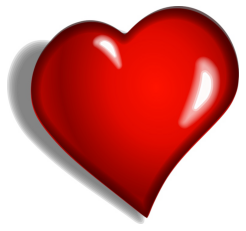

In [55]:
image = Image.open('data/heart.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()

In [56]:
data = gf_gift.vocab().most_common(300)
data[:10]

[('목걸이', 314),
 ('커플링', 239),
 ('반지', 120),
 ('다이아', 119),
 ('사진', 82),
 ('디자인', 73),
 ('귀걸이', 73),
 ('아이패드', 58),
 ('여자', 57),
 ('유명', 57)]

In [57]:
wc = WordCloud(
    font_path = 'c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.2, background_color='white'
).generate_from_frequencies(dict(data))

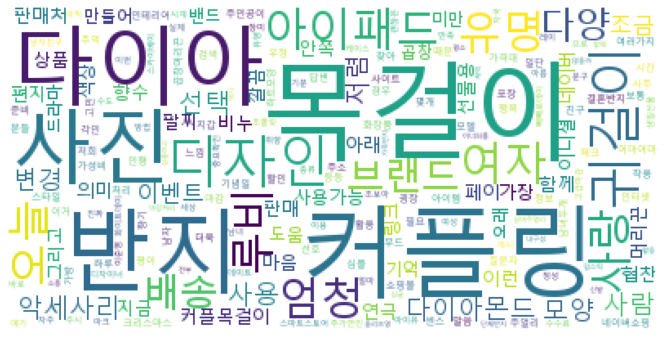

In [58]:
plt.figure(figsize=(12, 6))
plt.imshow(wc)
plt.axis('off')
plt.show()

* 하트 그림에 표시

In [59]:
from wordcloud import ImageColorGenerator

mask = np.array(Image.open('data/heart.jpg')) # 하트 이미지에 맞춰서 wordcloud하겠다
image_colors = ImageColorGenerator(mask)

In [60]:
wc = WordCloud(
    font_path = 'c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.2, background_color='white', mask = mask
).generate_from_frequencies(dict(data))
default_colors = wc.to_array()

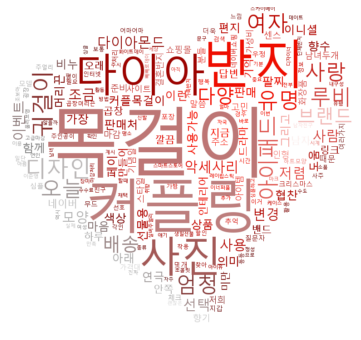

In [61]:
plt.figure(figsize=(12, 6))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()